In [ ]:
!git clone https://github.com/ngocson707/data.git

Cloning into 'data'...
remote: Enumerating objects: 9351, done.
remote: Counting objects: 100% (9351/9351), done.
remote: Compressing objects: 100% (3967/3967), done.
remote: Total 9351 (delta 5384), reused 9351 (delta 5384), pack-reused 0
Receiving objects: 100% (9351/9351), 21.01 MiB | 8.97 MiB/s, done.
Resolving deltas: 100% (5384/5384), done.
Updating files: 100% (12000/12000), done.


In [ ]:
!rm -r /content/data/.git

error: 2400
overheating: 2400
zero: 2400
overcurrent: 2400
normal: 2400


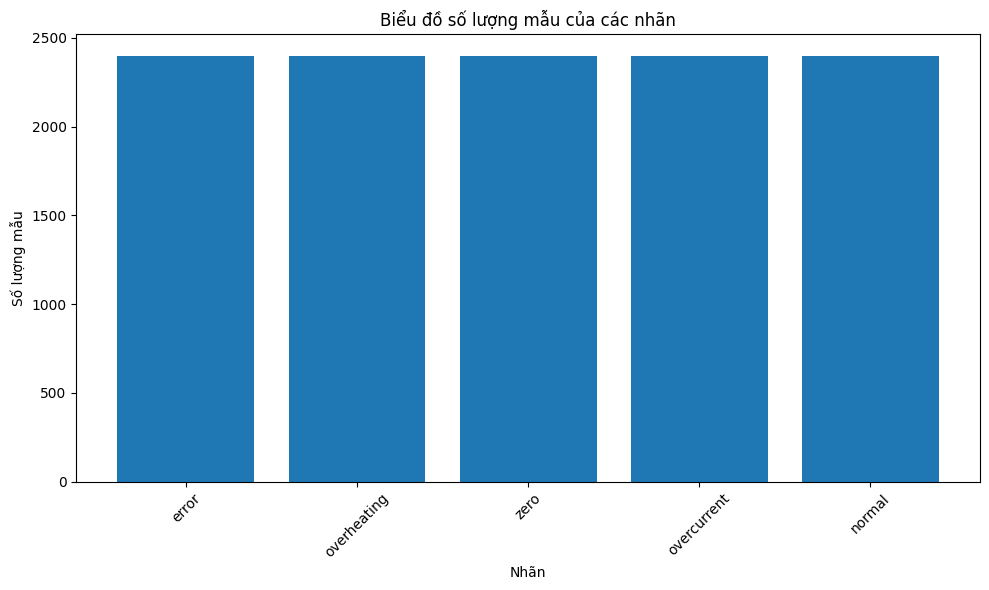

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Thư mục chứa dữ liệu của bạn
data_dir = '/content/data'

# Tạo một danh sách để lưu trữ thông tin về label và số lượng mẫu
label_counts = []

# Duyệt qua các thư mục con trong thư mục chứa CSV
for label in os.listdir(data_dir):
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir):
        # Đếm số lượng file CSV trong mỗi thư mục label
        csv_files = [f for f in os.listdir(label_dir) if f.endswith('.csv')]
        num_samples = len(csv_files)
        print(f"{label}: {num_samples}")
        label_counts.append({'Label': label, 'Count': num_samples})

# Tạo DataFrame từ danh sách label_counts
df = pd.DataFrame(label_counts)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(df['Label'], df['Count'])
plt.xlabel('Nhãn')
plt.ylabel('Số lượng mẫu')
plt.title('Biểu đồ số lượng mẫu của các nhãn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import os
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Đường dẫn tuyệt đối đến thư mục chứa dữ liệu
data_dir = "/content/data"

# Tạo danh sách để lưu trữ dữ liệu và nhãn
data = []
labels = []

# Đọc dữ liệu từ các tệp CSV trong các thư mục
for subdir in os.listdir(data_dir):
    subdir_path = os.path.join(data_dir, subdir)
    if os.path.isdir(subdir_path):
        label = subdir  # Tên thư mục chính sẽ là nhãn
        for file_name in os.listdir(subdir_path):
            if file_name.endswith(".csv"):
                file_path = os.path.join(subdir_path, file_name)
                try:
                    df = pd.read_csv(file_path)  # Đọc tệp CSV
                    if "Current" in df.columns:
                        current_values = df["Current"].values  # Lấy dữ liệu từ cột "current"

                        # Chỉ thêm dữ liệu từ tệp có ít nhất 9000 phần tử
                        if len(current_values) >= 9000:
                            data.append(current_values)    # Thêm dữ liệu vào danh sách
                            labels.append(label)           # Thêm nhãn vào danh sách
                        else:
                            print(f"Skipping {file_path}: Not enough data (less than 9000 elements)")
                    else:
                        print(f"Missing 'current' column in {file_path}")
                except Exception as e:
                    print(f"Error reading {file_path}: {str(e)}")

In [ ]:
# Chuyển đổi danh sách data thành mảng NumPy
X = np.array(data)

# Chuyển đổi danh sách labels thành mã số
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (ví dụ: 80% cho huấn luyện, 20% cho kiểm tra)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tạo mô hình SVM
svm_model = SVC(kernel='linear')

# Huấn luyện mô hình trên tập huấn luyện
svm_model.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = svm_model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Tên tệp để lưu mô hình
model_filename = "/content/drive/MyDrive/train/svm_model.pkl"

# # Lưu mô hình SVM đã huấn luyện
# joblib.dump(svm_model, model_filename)

# Để chuyển đổi số 0, 1, 2, 3, 4 thành tên nhãn gốc
original_labels = label_encoder.inverse_transform([0, 1, 2, 3, 4])
print(original_labels)

Accuracy: 0.9091666666666667
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       726
           1       0.93      0.92      0.92       723
           2       0.98      1.00      0.99       709
           3       0.83      0.90      0.87       735
           4       0.87      1.00      0.93       707

    accuracy                           0.91      3600
   macro avg       0.91      0.91      0.91      3600
weighted avg       0.91      0.91      0.91      3600

['error' 'normal' 'overcurrent' 'overheating' 'zero']


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Thêm precision
recall = recall_score(y_test, y_pred, average='weighted')  # Thêm recall
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9091666666666667
Precision: 0.9140406451555712
Recall: 0.9091666666666667
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       726
           1       0.93      0.92      0.92       723
           2       0.98      1.00      0.99       709
           3       0.83      0.90      0.87       735
           4       0.87      1.00      0.93       707

    accuracy                           0.91      3600
   macro avg       0.91      0.91      0.91      3600
weighted avg       0.91      0.91      0.91      3600



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score

# Dự đoán nhãn cho tập test
y_test_pred = svm_model.predict(X_test)

# Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_test_pred)

# Tính toán classification report
print(classification_report(y_test, y_test_pred))

# Tính toán confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Tính toán độ nhạy và độ đặc hiệu từ confusion matrix
true_negatives = conf_matrix[0, 0]
false_negatives = conf_matrix[1, 0]
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

# Tính toán độ nhạy và độ đặc hiệu
sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

# Tính toán F1-Score
from sklearn.metrics import f1_score
f1_micro = f1_score(y_test, y_test_pred, average='micro')
f1_macro = f1_score(y_test, y_test_pred, average='macro')
f1_weighted = f1_score(y_test, y_test_pred, average='weighted')


precision = precision_score(y_test, y_pred, average='weighted')  # Thêm precision
recall = recall_score(y_test, y_pred, average='weighted')  # Thêm recall
print(f"Precision: {precision}")
print(f"Recall: {recall}")

print(f"Accuracy: {accuracy}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"F1-Score (Micro): {f1_micro}")
print(f"F1-Score (Macro): {f1_macro}")
print(f"F1-Score (Weighted): {f1_weighted}")


              precision    recall  f1-score   support

           0       0.96      0.73      0.83       726
           1       0.93      0.92      0.92       723
           2       0.98      1.00      0.99       709
           3       0.83      0.90      0.87       735
           4       0.87      1.00      0.93       707

    accuracy                           0.91      3600
   macro avg       0.91      0.91      0.91      3600
weighted avg       0.91      0.91      0.91      3600

Precision: 0.9140406451555712
Recall: 0.9091666666666667
Accuracy: 0.9091666666666667
Sensitivity: 1.0
Specificity: 1.0
F1-Score (Micro): 0.9091666666666667
F1-Score (Macro): 0.9078377208729833
F1-Score (Weighted): 0.9072112817088007


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import joblib

# Đường dẫn tuyệt đối đến thư mục chứa dữ liệu
data_dir = "/content/data"

# Tạo danh sách để lưu trữ dữ liệu và nhãn
data = []
labels = []

# Đọc dữ liệu từ các tệp CSV trong các thư mục
for subdir in os.listdir(data_dir):
    subdir_path = os.path.join(data_dir, subdir)
    if os.path.isdir(subdir_path):
        label = subdir  # Tên thư mục chính sẽ là nhãn
        for file_name in os.listdir(subdir_path):
            if file_name.endswith(".csv"):
                file_path = os.path.join(subdir_path, file_name)
                try:
                    df = pd.read_csv(file_path)  # Đọc tệp CSV
                    if "Current" in df.columns:
                        current_values = df["Current"].values  # Lấy dữ liệu từ cột "current"

                        # Chỉ thêm dữ liệu từ tệp có ít nhất 9000 phần tử
                        if len(current_values) >= 9000:
                            data.append(current_values)    # Thêm dữ liệu vào danh sách
                            labels.append(label)           # Thêm nhãn vào danh sách
                        else:
                            print(f"Skipping {file_path}: Not enough data (less than 9000 elements)")
                    else:
                        print(f"Missing 'current' column in {file_path}")
                except Exception as e:
                    print(f"Error reading {file_path}: {str(e)}")

# Chuyển danh sách dữ liệu và nhãn thành mảng NumPy
data = np.array(data)
labels = np.array(labels)

# Mã hóa nhãn
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(data, labels_encoded, test_size=0.3, random_state=42)

# Xây dựng mô hình CNN
model = keras.Sequential([
    layers.Reshape((9000, 1), input_shape=(9000,)),  # Input shape phải là (9000,)
    layers.Conv1D(32, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Đánh giá mô hình trên tập kiểm tra
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

# # Lưu mô hình vào một tệp
# model.save("/content/drive/MyDrive/train/cnn_model.h5")

# # Lưu trạng thái LabelEncoder vào một tệp
# joblib.dump(label_encoder, '/content/drive/MyDrive/train/label_encoder.pkl')

# Dự đoán nhãn trên tập kiểm tra
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Chuyển đổi nhãn đã mã hóa trở lại nhãn gốc
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred_classes)

# In báo cáo phân loại
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test_original, y_pred_original))


Epoch 1/5
237/237 [==============================] - 13s 13ms/step - loss: 0.5221 - accuracy: 0.7827 - val_loss: 0.2810 - val_accuracy: 0.9036
Epoch 2/5
237/237 [==============================] - 3s 11ms/step - loss: 0.3347 - accuracy: 0.8619 - val_loss: 0.3198 - val_accuracy: 0.8381
Epoch 3/5
237/237 [==============================] - 3s 12ms/step - loss: 0.2940 - accuracy: 0.8815 - val_loss: 0.4691 - val_accuracy: 0.7512
Epoch 4/5
237/237 [==============================] - 3s 12ms/step - loss: 0.2885 - accuracy: 0.8795 - val_loss: 0.2933 - val_accuracy: 0.8810
Epoch 5/5
113/113 [==============================] - 1s 5ms/step - loss: 0.4608 - accuracy: 0.7778
Test accuracy: 0.7777777910232544
113/113 [==============================] - 1s 4ms/step
Classification Report:
              precision    recall  f1-score   support

       error       0.81      0.82      0.82       726
      normal       0.59      0.87      0.70       723
 overcurrent       0.91      1.00      0.95       709
 ov

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Tính sensitivity và specificity
true_negatives = conf_matrix[0, 0]
false_negatives = conf_matrix[1, 0]
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

f1_macro = f1_score(y_test, y_pred_classes, average='macro')
print(f"Macro F1-Score: {f1_macro}")

f1_micro = f1_score(y_test, y_pred_classes, average='micro')
print(f"Micro F1-Score: {f1_micro}")

f1_weighted = f1_score(y_test, y_pred_classes, average='weighted')
print(f"Weighted F1-Score: {f1_weighted}")

Accuracy: 0.7777777777777778
Sensitivity: 1.0
Specificity: 1.0
Macro F1-Score: 0.7728031286853533
Micro F1-Score: 0.7777777777777778
Weighted F1-Score: 0.7707096378710859


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Chuyển đổi nhãn thành dạng one-hot encoding
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Tính AUC cho từng lớp và tính trung bình (micro-average) AUC
n_classes = len(label_encoder.classes_)
auc_values = []
for i in range(n_classes):
    auc = roc_auc_score(y_test_bin[:, i], y_pred[:, i])
    auc_values.append(auc)

# Tính trung bình AUC (micro-average)
micro_avg_auc = np.mean(auc_values)

print(f"Micro-average AUC: {micro_avg_auc}")

Micro-average AUC: 0.9786539765900887
